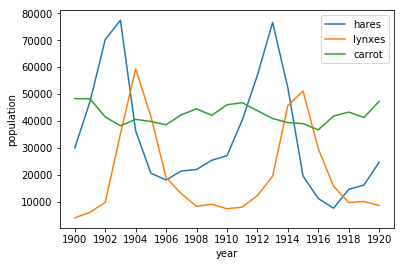

In [6]:
 import matplotlib.pyplot as plt
import numpy as np

#1
a = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")
b = a[:,0]

plt.plot(b,a[:,1], label = "hares")
plt.plot(b,a[:,2], label = "lynxes")
plt.plot(b,a[:,3], label = "carrot")

plt.xticks(np.arange(1900,1921, step = 2))
plt.xlabel("year")
plt.ylabel("population")
plt.legend()
plt.show()

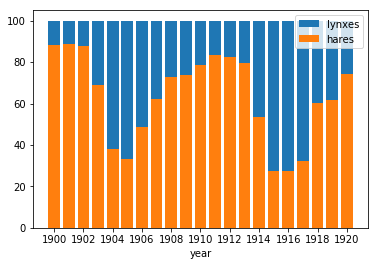

In [9]:
#2
plt.bar(b, 100, label = "lynxes")
plt.bar(b, 100*a[:,1]/(a[:,1]+a[:,2]), label = "hares")

plt.xticks(np.arange(1900,1921, step = 2))
plt.xlabel("year")
plt.legend()
plt.show()

In [22]:
 #3
m = a.mean(axis = 0)
mask = [False, True, True, True]
std = pow(pow((a - m), 2).mean(axis=0), 1/2)
print("mean:",m[mask])
print("std:",std[mask])
figure,plots = plt.subplots(1, 3, figsize = (10,5))
plots[0].hist(a[:, 1], color='grey')
plots[0].set_title("hares")
plots[0].axvline(x=m[1])
plots[1].hist(a[:, 2], color='yellow')
plots[1].set_title("lynxes")
plots[1].axvline(x=m[2])
plots[2].hist(a[:, 3],  color='orange')
plots[2].set_title("carrot")
plots[2].axvline(x=m[3])


mean: [34080.95238095 20166.66666667 42400.        ]
std: [20897.90645809 16254.59153691  3322.50622558]


In [26]:
#4
c=a[a.argmax(axis = 0)[mask], 0]

plt.plot(b,a[:,1], label = "hares")
plt.plot(b,a[:,2], label = "lynxes")
plt.plot(b,a[:,3], label = "carror")
plt.xticks(np.arange(1900,1921, step = 2))
plt.ylabel("population")
plt.xlabel("time")


plt.scatter(b[a[:,1].argmax()], a[:,1].max())
plt.scatter(b[a[:,2].argmax()], a[:,2].max())
plt.scatter(b[a[:,3].argmax()], a[:,3].max())
plt.legend()
plt.show()

In [32]:
#5
d = np.repeat('l', a.shape[0]) 
d[a[:,1]>a[:,2]] = 'h'
print(d);

mask = np.array([d == 'h'])
plt.pie([mask.sum(),len(mask[0]) - mask.sum()], labels = ["hares", "lynxes"])
plt.show()

['h' 'h' 'h' 'h' 'l' 'l' 'l' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'l' 'l' 'l'
 'h' 'h' 'h']


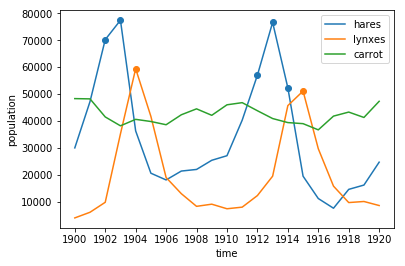

In [33]:
#6
plt.scatter(b[a[:,1]>50000],a[:,1][a[:,1]>50000])
plt.scatter(b[a[:,2]>50000],a[:,2][a[:,2]>50000])
plt.scatter(b[a[:,3]>50000],a[:,3][a[:,3]>50000])
plt.plot(b,a[:,1], label = "hares")
plt.plot(b,a[:,2], label = "lynxes")
plt.plot(b,a[:,3], label = "carrot")

plt.xticks(np.arange(1900,1921, step = 2))
plt.ylabel("population")
plt.xlabel("time")
plt.legend()
plt.show()

In [36]:
#7
print("hares ", int((a[np.where(a[:,1] == a[:,1].min()),0])[0][0]), int((np.concatenate((a[:(np.where(a[:,1] == a[:,1].min()))[0][0],0], a[(np.where(a[:,1] == a[:,1].min()))[0][0]+1:,0]))).min()))
print("lynxes", int((a[np.where(a[:,2] == a[:,2].min()),0])[0][0]), int((np.concatenate((a[:(np.where(a[:,2] == a[:,2].min()))[0][0],0], a[(np.where(a[:,2] == a[:,2].min()))[0][0]+1:,0]))).min()))
print("carrot", int((a[np.where(a[:,3] == a[:,3].min()),0])[0][0]), int((np.concatenate((a[:(np.where(a[:,3] == a[:,3].min()))[0][0],0], a[(np.where(a[:,3] == a[:,3].min()))[0][0]+1:,0]))).min()))


hares  1917 1900
lynxes 1900 1901
carrot 1916 1900


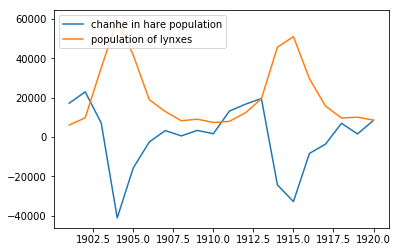

correlation coefficient: -0.8494801603656876


In [47]:
 #8
a1 = a[1:,1] - a[:20,1]
plt.plot(b[1:], a1, label = "chanhe in hare population")
plt.plot(b[1:], a[1:,2], label = "population of lynxes")

plt.legend()
plt.show()
print("correlation coefficient:", np.corrcoef(a1,a[1:,2])[1,0])

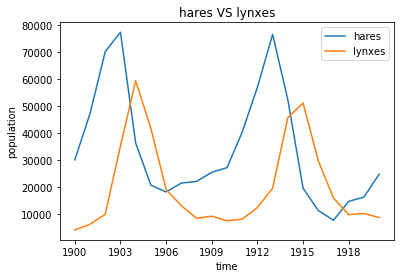

In [50]:

plt.title("hares VS carrot")

plt.plot(a[:,0], a[:,1], label = "hares")
plt.plot(a[:,0], a[:,3], label = "carrot")
plt.xticks(np.arange(a[:,0].min(), a[:,0].max(), 3))
plt.xlabel("time")
plt.ylabel("population")

plt.legend()
plt.show();

plt.title("hares VS lynxes")
plt.plot(a[:,0], a[:,1], label = "hares")
plt.plot(a[:,0], a[:,2], label = "lynxes")
plt.xticks(np.arange(a[:,0].min(), a[:,0].max(), 3))
plt.xlabel("time")
plt.ylabel("population")

plt.legend()
plt.show();



In [52]:
#10
import sklearn.linear_model as lm
reg = lm.LinearRegression()
a1 = a[1:20,1] - a[:19,1]
lynxes = a[:19,2].reshape(-1,1)
reg.fit(lynxes,a1)
prediction = reg.predict(a[20,2])[0] + a[19,1]
print("prediction:", prediction)
print("a ratio of the error to the true value:", np.abs(prediction / a[20, 1] - 1))

prediction: 24364.92940744449
a ratio of the error to the true value: 0.013565611034635938
